In [10]:
# pip install datasets

In [1]:
from datasets import load_dataset
import spacy
import pandas as pd

In [2]:
dataset = load_dataset("clarin-knext/fiqa-pl", 'corpus')
dataset=pd.DataFrame(dataset['corpus'])
dataset

,_id,title,text
0,3,,"Nie mówię, że nie podoba mi się też pomysł szk..."
1,31,,Tak więc nic nie zapobiega fałszywym ocenom po...
2,56,,Nigdy nie możesz korzystać z FSA dla indywidua...
3,59,,Samsung stworzył LCD i inne technologie płaski...
4,63,,Oto wymagania SEC: Federalne przepisy dotycząc...
...,...,...,...
57633,599946,,">Cóż, po pierwsze, drogi to coś więcej niż hob..."
57634,599953,,"Tak, robią. Na dotacje dla firm farmaceutyczny..."
57635,599966,,">To bardzo smutne, że nie rozumiesz ludzkiej n..."
57636,599975,,„Czy Twój CTO pozwolił dużej grupie użyć „„adm...


Take 1 thousand random passages from the FIQA-PL corpus.

In [3]:
df_1000 = dataset.sample(n=1000, random_state=42)

In [4]:
# !pip install spacy
# !python -m spacy download pl_core_news_sm

In [5]:
nlp = spacy.load("pl_core_news_sm")

Use the lemmatized and sentence split documents (from ex. 5) to identify the expressions that consist of consecutive words starting with a capital letter (you will have to look at the inflected form of the word to check its capitalization) that do not occupy the first position in a sentence. E.g. the sentence:
Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych.
should yield the following entries: Kraków, Polska, Stan Zjednoczony

In [6]:
def lemmatize(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)

In [7]:
df_1000['text'] = df_1000['text'].astype(str)

df_1000['lemmas'] = df_1000['text'].apply(lemmatize).apply(pd.Series)

In [8]:
df_1000

,_id,title,text,lemmas
32617,337302,,>To nie różni się od Arthura Andersena. Kiedy ...,> to nie różnić się od Arthura Andersen . kied...
224,2456,,W Stanach Zjednoczonych możesz wejść do niektó...,w Stany Zjednoczone móc wejść do niektóry skle...
6623,68389,,"Cóż, gdybyśmy mieli demokrację, to ludzie są t...","cóż , gdyby być mieć demokracja , to człowiek ..."
14005,144158,,Właściwie to ma sens. Jeśli rząd ma mniejszy w...,właściwie to mieć sens . jeśli rząd mieć mniej...
49565,514970,,"Nie wspomniałeś o kraju, a dokładne zasady będ...","nie wspomniać być o kraj , a dokładny zasada b..."
...,...,...,...,...
40577,422579,,"Zależy to od warunków najmu, ale trudno wyobra...","Zależy to od warunki najem , ale trudno wyobra..."
54493,567424,,"Nie jestem jednak pewien, czy rozumowanie nada...","nie być jednak pewny , czy rozumowanie nadal b..."
3953,41156,,Jednym z najskuteczniejszych artykułów promocy...,"jeden z skuteczny artykuł promocyjny , który d..."
55966,582727,,"Jak to jest trudniejsze? Wszystko, co musisz z...","jak to być trudny ? wszystko , co musieć zrobi..."


In [9]:
def identify_expression(text):
    doc = nlp(text)
    current_expression = []
    found_expressions = []

    for sentence in doc.sents:
        for token in sentence[1:]:
            if token.is_title and not token.is_punct:
                current_expression.append(token.text)
            else:
                if current_expression:
                    found_expressions.append(" ".join(current_expression))
                    current_expression = []
    return ', '.join(found_expressions)

In [10]:
sentence = 'Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych.'
identify_expression(sentence)

'Krakowie, Polski, Stanów Zjednoczonych'

In [11]:
df_1000['words'] = df_1000['lemmas'].apply(identify_expression).apply(pd.Series)

In [12]:
df_1000

,_id,title,text,lemmas,words
32617,337302,,>To nie różni się od Arthura Andersena. Kiedy ...,> to nie różnić się od Arthura Andersen . kied...,"Arthura Andersen, Anderson, Enron, Enron, Ande..."
224,2456,,W Stanach Zjednoczonych możesz wejść do niektó...,w Stany Zjednoczone móc wejść do niektóry skle...,"Stany Zjednoczone, Wielki Brytania"
6623,68389,,"Cóż, gdybyśmy mieli demokrację, to ludzie są t...","cóż , gdyby być mieć demokracja , to człowiek ...",
14005,144158,,Właściwie to ma sens. Jeśli rząd ma mniejszy w...,właściwie to mieć sens . jeśli rząd mieć mniej...,
49565,514970,,"Nie wspomniałeś o kraju, a dokładne zasady będ...","nie wspomniać być o kraj , a dokładny zasada b...",Wielki Brytania
...,...,...,...,...,...
40577,422579,,"Zależy to od warunków najmu, ale trudno wyobra...","Zależy to od warunki najem , ale trudno wyobra...",Twój
54493,567424,,"Nie jestem jednak pewien, czy rozumowanie nada...","nie być jednak pewny , czy rozumowanie nadal b...",
3953,41156,,Jednym z najskuteczniejszych artykułów promocy...,"jeden z skuteczny artykuł promocyjny , który d...",Twój
55966,582727,,"Jak to jest trudniejsze? Wszystko, co musisz z...","jak to być trudny ? wszystko , co musieć zrobi...",E2


In [13]:
def expresions(tokens):
    expr_list = [i.strip() for i in tokens.split(",") if i.strip() != '']
    return expr_list

In [14]:
expr = []
for tokens in df_1000['words']:
    expr.extend(expresions(tokens))

Compute the frequency of each identified expression and print 50 results with the largest number of occurrences.

In [15]:
from collections import Counter
unigram_counts = Counter(expr)

In [16]:
unigram_counts.most_common(50)

[('Twój', 58),
 ('Ciebie', 39),
 ('Wielki Brytania', 33),
 ('Roth', 30),
 ('Stany Zjednoczone', 29),
 ('Internet', 22),
 ('A', 19),
 ('Amazon', 19),
 ('Indie', 19),
 ('B', 18),
 ('S&P', 18),
 ('Kanada', 17),
 ('Apple', 16),
 ('Google', 16),
 ('K', 16),
 ('X', 15),
 ('Twoją', 14),
 ('Twoich', 13),
 ('Ameryka', 13),
 ('Vanguard', 12),
 ('Amerykanów', 12),
 ('Twojej', 11),
 ('S', 10),
 ('Europa', 10),
 ('Whole Foods', 10),
 ('Money', 9),
 ('Niemcy', 9),
 ('Iran', 9),
 ('C', 9),
 ('Tesla', 8),
 ('R', 8),
 ('Jork', 8),
 ('Izrael', 8),
 ('Rosja', 8),
 ('Microsoft', 7),
 ('Netflix', 7),
 ('Comcast', 7),
 ('D', 7),
 ('Najlepsze', 7),
 ('I', 6),
 ('P', 6),
 ('Hathaway', 6),
 ('Buffetta', 6),
 ('Fed', 6),
 ('Facebook', 6),
 ('Lucasfilm', 6),
 ('Twojego', 5),
 ('Chiny', 5),
 ('Hiszpania', 5),
 ('Amazona', 5)]

Apply the NER from SpaCy to identify the named entities in the same set of documents.

In [17]:
nlp.pipe_names

['tok2vec',
 'morphologizer',
 'parser',
 'lemmatizer',
 'tagger',
 'attribute_ruler',
 'ner']

In [18]:
def identify_entities(document):
    doc = nlp(document)
    entities = [ent.text for ent in doc.ents]
    return ', '.join(entities)

In [19]:
df_1000['NER'] = df_1000['lemmas'].apply(identify_entities).apply(pd.Series)

In [20]:
def spacy_large_ner(document):
  return ', '.join([ent.label_ for ent in nlp(document).ents])

In [21]:
df_1000['classes'] = df_1000['lemmas'].apply(spacy_large_ner).apply(pd.Series)

In [22]:
df_1000

,_id,title,text,lemmas,words,NER,classes
32617,337302,,>To nie różni się od Arthura Andersena. Kiedy ...,> to nie różnić się od Arthura Andersen . kied...,"Arthura Andersen, Anderson, Enron, Enron, Ande...","Arthura Andersen, Arthur Anderson, Enron, Enro...","persName, persName, placeName, persName, persN..."
224,2456,,W Stanach Zjednoczonych możesz wejść do niektó...,w Stany Zjednoczone móc wejść do niektóry skle...,"Stany Zjednoczone, Wielki Brytania","Stany Zjednoczone, PayPal, USA, Wielki Brytania","placeName, orgName, placeName, placeName"
6623,68389,,"Cóż, gdybyśmy mieli demokrację, to ludzie są t...","cóż , gdyby być mieć demokracja , to człowiek ...",,,
14005,144158,,Właściwie to ma sens. Jeśli rząd ma mniejszy w...,właściwie to mieć sens . jeśli rząd mieć mniej...,,,
49565,514970,,"Nie wspomniałeś o kraju, a dokładne zasady będ...","nie wspomniać być o kraj , a dokładny zasada b...",Wielki Brytania,Wielki Brytania,placeName
...,...,...,...,...,...,...,...
40577,422579,,"Zależy to od warunków najmu, ale trudno wyobra...","Zależy to od warunki najem , ale trudno wyobra...",Twój,USA,placeName
54493,567424,,"Nie jestem jednak pewien, czy rozumowanie nada...","nie być jednak pewny , czy rozumowanie nadal b...",,kredyt studencki,geogName
3953,41156,,Jednym z najskuteczniejszych artykułów promocy...,"jeden z skuteczny artykuł promocyjny , który d...",Twój,,
55966,582727,,"Jak to jest trudniejsze? Wszystko, co musisz z...","jak to być trudny ? wszystko , co musieć zrobi...",E2,,


Plot the frequency (histogram) of the identified classes.

In [23]:
ner = []
for tokens in df_1000['NER']:
    ner.extend(expresions(tokens))

In [24]:
ner_count = Counter(ner)
ner_count.most_common(10)

[('USA', 121),
 ('amerykański', 52),
 ('IRA', 35),
 ('Stany Zjednoczone', 31),
 ('Wielki Brytania', 31),
 ('ETF', 29),
 ('Indie', 19),
 ('Ameryka', 18),
 ('Amazon', 17),
 ('Apple', 16)]

In [25]:
classes = []
for tokens in df_1000['classes']:
    classes.extend(expresions(tokens))

In [26]:
classes_count = Counter(classes)
classes_count.most_common(10)

[('orgName', 773),
 ('placeName', 691),
 ('persName', 622),
 ('date', 251),
 ('geogName', 108),
 ('time', 7)]

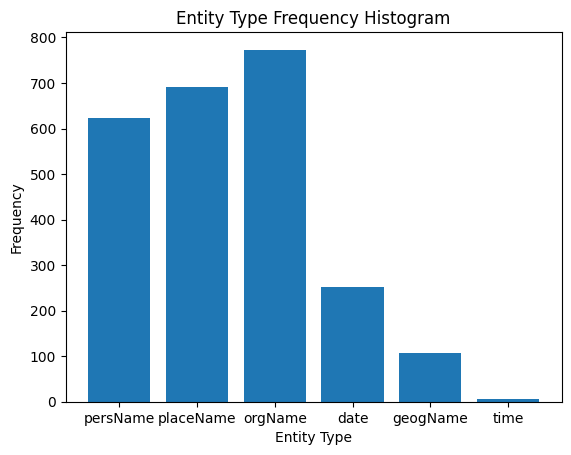

In [27]:
import matplotlib.pyplot as plt

labels, values = zip(*classes_count.items())

plt.bar(labels, values)
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.title('Entity Type Frequency Histogram')
plt.show()


Display 10 most frequent Named Entities for each identified type.

In [31]:
pairs = []
for index, row in df_1000.iterrows():
  ner = row['NER'].split(',')
  classes = row['classes'].split(',')
  temp = [(ner[i].strip(), classes[i].strip()) for i in range(len(classes)) if ner[i] != '']
  pairs.extend(temp)

class_dict = {}
for pair in pairs:
  if pair[1] == 'orgName':
    class_dict.setdefault('orgName', []).append(pair[0])
  if pair[1] == 'placeName':
      class_dict.setdefault('placeName', []).append(pair[0])
  if pair[1] == 'persName':
      class_dict.setdefault('persName', []).append(pair[0])
  if pair[1] == 'geogName':
      class_dict.setdefault('geogName', []).append(pair[0])
  if pair[1] == 'date':
      class_dict.setdefault('date', []).append(pair[0])
  if pair[1] == 'time':
      class_dict.setdefault('time', []).append(pair[0])

In [32]:
for key in class_dict.keys():
  count = Counter(class_dict[key])
  print(key)
  print(count.most_common(10))
  print()

persName
[('Amazon', 17), ('Netflix', 6), ('Hathaway', 6), ('Buffetta', 6), ('Vanguard', 5), ('musiałbyś', 5), ('Gdybyś', 5), ('OP', 5), ('Rotha', 5), ('Bóg', 5)]

placeName
[('USA', 119), ('amerykański', 52), ('Stany Zjednoczone', 30), ('Wielki Brytania', 24), ('Indie', 19), ('Ameryka', 18), ('Kanada', 16), ('Amerykanów', 13), ('Niemcy', 9), ('Izrael', 9)]

orgName
[('IRA', 35), ('ETF', 29), ('Apple', 16), ('HSA', 11), ('Roth IRA', 11), ('Google', 11), ('MBA', 10), ('S&P', 10), ('Roth', 10), ('Whole Foods', 10)]

date
[('2008 rok', 12), ('2013 rok', 10), ('2012 rok', 7), ('2015 rok', 7), ('10 .', 7), ('2014 rok', 6), ('2016', 6), ('1099', 6), ('15 kwiecień', 5), ('2009 rok', 5)]

geogName
[('Europa', 10), ('azjatycki', 7), ('Quicken', 4), ('Afryka', 4), ('Bliski Wschód', 3), ('Mint', 2), ('Alaska', 2), ('Costco', 2), ('Bliskiego wschód', 2), ('Edmunds', 2)]

time
[('25', 1), ('10 rano', 1), ('15', 1), ('południe', 1), ('godzina 14 .', 1), ('00', 1), ('7 .', 1)]



Display 50 most frequent Named Entities including their count and type.

In [33]:
pairs_count = Counter(pairs)
pairs_count.most_common(50)

[(('USA', 'placeName'), 119),
 (('amerykański', 'placeName'), 52),
 (('IRA', 'orgName'), 35),
 (('Stany Zjednoczone', 'placeName'), 30),
 (('ETF', 'orgName'), 29),
 (('Wielki Brytania', 'placeName'), 24),
 (('Indie', 'placeName'), 19),
 (('Ameryka', 'placeName'), 18),
 (('Amazon', 'persName'), 17),
 (('Apple', 'orgName'), 16),
 (('Kanada', 'placeName'), 16),
 (('Amerykanów', 'placeName'), 13),
 (('2008 rok', 'date'), 12),
 (('HSA', 'orgName'), 11),
 (('Roth IRA', 'orgName'), 11),
 (('Google', 'orgName'), 11),
 (('MBA', 'orgName'), 10),
 (('2013 rok', 'date'), 10),
 (('Europa', 'geogName'), 10),
 (('S&P', 'orgName'), 10),
 (('Roth', 'orgName'), 10),
 (('Whole Foods', 'orgName'), 10),
 (('&', 'orgName'), 10),
 (('CPA', 'orgName'), 10),
 (('UE', 'orgName'), 10),
 (('SEC', 'orgName'), 9),
 (('Niemcy', 'placeName'), 9),
 (('IRS', 'orgName'), 9),
 (('Izrael', 'placeName'), 9),
 (('unia', 'orgName'), 9),
 (('Microsoft', 'orgName'), 8),
 (('nowy Jork', 'placeName'), 8),
 (('Iran', 'placeName')

Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color. (For demo application Streamlit might be useful for displaying NER results).

In [34]:
sentence_5 = []
for index, row in df_1000.iterrows():
    document = row['text']
    doc = nlp(document)
    selected_sentences = [
        sent.text
        for sent in doc.sents
        if sum(ent.label_ in ["orgName", "persName", "geogName", "placeName", "date", "time"] for ent in sent.ents) >= 2
    ]
    sentence_5.extend(selected_sentences)
    if len(sentence_5) >=5:
      break

In [35]:
sentence_5

['Myślę, że firmy takie jak Enron chciały Andersona, ponieważ były skłonne naginać zasady i działać w szarej strefie.',
 'To ich gówniany prawnik wpadł w szał Bonanzy, kiedy stało się jasne, że Enron upadnie.',
 'Zapewnia nieograniczoną przestrzeń dyskową, przeciąganie i zmniejszanie profesjonalizmu witryny, obsługę domen na całym świecie, kontrolę cPanel, dostęp do FTP, a także wiele więcej.',
 "Większość ludzi na studiach MBA myśli, że będzie Steve'em Jobsem.",
 ', ale Steve Jobs to ludzie, którzy zakładają firmę, zamiast iść na studia MBA.']

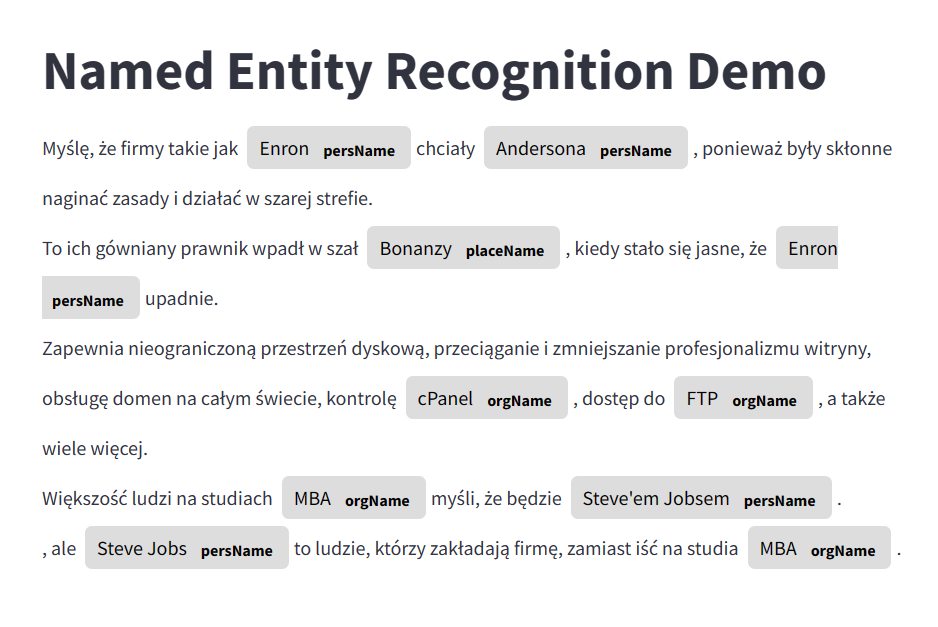

*   Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?


NER radzi sobie lepiej w powyższych zadaniach


*   What are the drawbacks of the method based on capital letters?

Metoda ta jest mniej precyzyjna, ponieważ nie bierzemy pod uwagę kontekstu

*   What are the drawbacks of the method based on NER?

Dużo większa złożoność obliczeniowa

*   Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.

Najgorsze wyniki osiągają time i date, ponieważ trudności mogą wystąpić w przypadku różnych formatów oraz różnych wyrażeń czasowych.
Natomiast najlepsze wyniki osiągają place i org, gdyż miejsca i organizacje są łatwe do zidentyfikowania.


*   Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?

NER sam w sobie może nie poradzić sobie w identyfikacji różnych wariantów nazw własnych. Przydatny może być tutaj algorytm do rozpoznawania synonimów

*   Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?

W wielu dziedzinach, takich jak przetwarzanie tekstu medycznego, finansowego czy prawnego, zastosowanie NER może przynieść ogromne korzyści. Na przykład, w medycynie, identyfikacja nazw własnych, takich jak nazwy chorób czy leków, może pomóc w analizie dokumentów medycznych i wspierać podejmowanie decyzji klinicznych.